TravelTide Projekt - die Fortsetzung mit Clustering. [Hier ist der Link zum 1. Teil](https://github.com/Akienobob/Masterschool/blob/main/TravelTideProjektTeil1.ipynb)

In [1]:
import pandas as pd
url_user_features ="https://raw.githubusercontent.com/Akienobob/Masterschool/refs/heads/main/user_features.csv"
uf = pd.read_csv(url_user_features, index_col=[0])

In [2]:
# User-Features-Tabelle als Backup in einem anderen Dataframe kopieren
uf2=uf
uf

,user_id,gender,married,has_children,age,user_since,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec
0,531931,1,False,False,40,25,2,NaN,1.500000,2.500000,492.500000,2.0,1.500000,944.145000,2.0,0.500000,70.875000
1,611065,1,False,False,43,23,4,NaN,1.500000,1.250000,407.500000,4.0,1.500000,893.192500,4.0,0.750000,146.750000
2,586762,1,False,False,37,24,3,NaN,1.333333,6.333333,1939.666667,3.0,1.333333,607.430000,3.0,0.333333,116.375000
3,229330,1,True,False,48,31,4,NaN,1.750000,1.500000,798.250000,4.0,1.750000,387.027500,4.0,0.250000,119.625000
4,536035,0,False,False,29,25,2,NaN,1.500000,1.000000,163.000000,2.0,1.500000,488.340000,2.0,0.500000,102.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,591155,0,True,False,42,24,2,NaN,1.000000,3.500000,466.000000,2.0,1.000000,546.350000,1.0,1.000000,115.125000
5994,521235,1,False,False,35,25,5,NaN,1.600000,4.600000,741.800000,5.0,1.800000,805.824000,5.0,1.200000,179.875000
5995,600351,1,True,False,48,23,2,NaN,1.000000,4.000000,1040.000000,1.0,1.000000,523.340000,2.0,0.500000,112.500000
5996,577044,1,True,True,55,24,3,NaN,1.000000,0.000000,0.000000,2.0,1.333333,301.646667,3.0,0.333333,150.111111


# Analyse der Daten mithilfe von Seaborn-Diagrammen

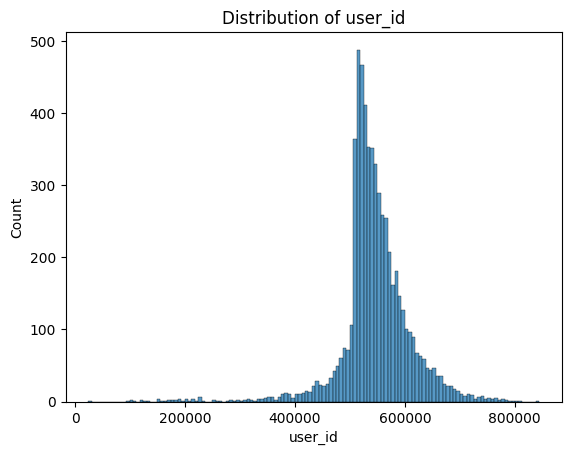

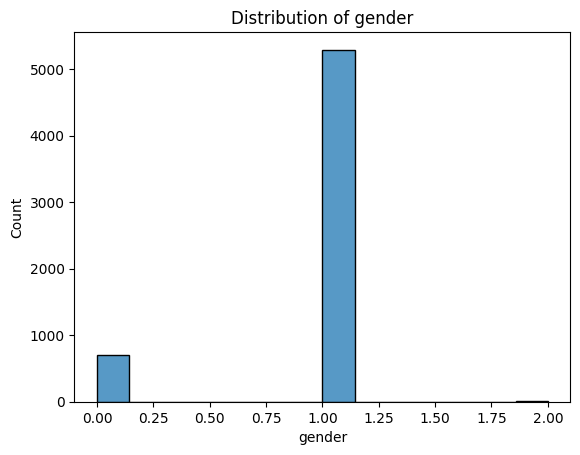

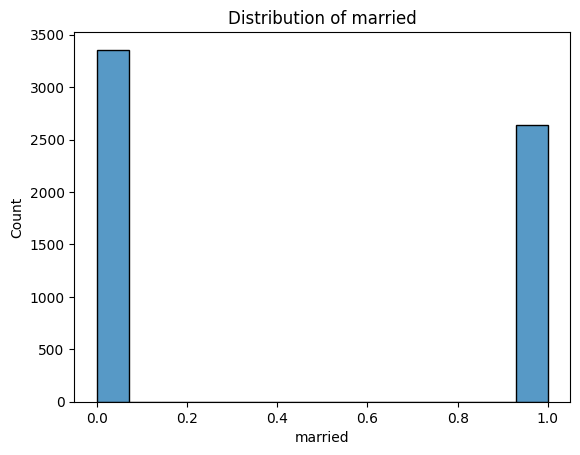

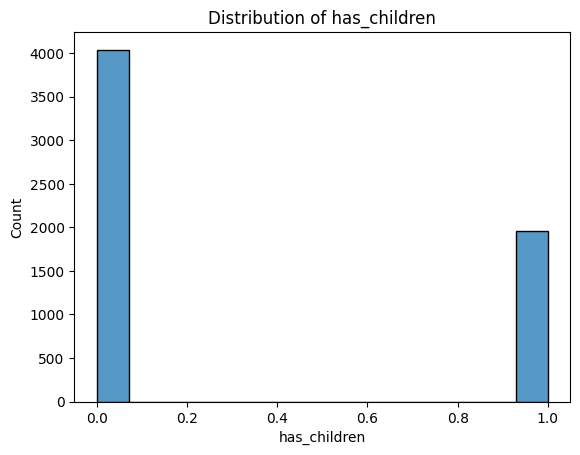

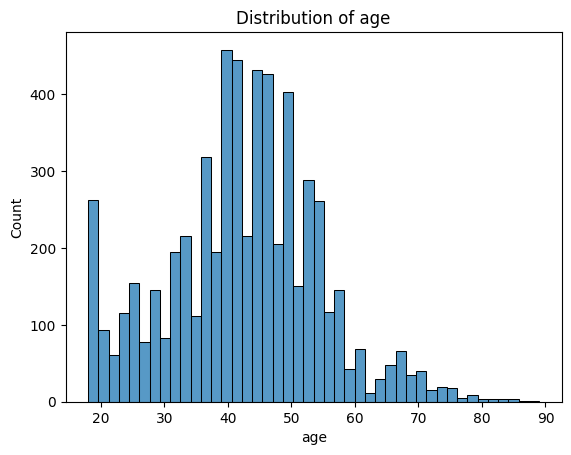

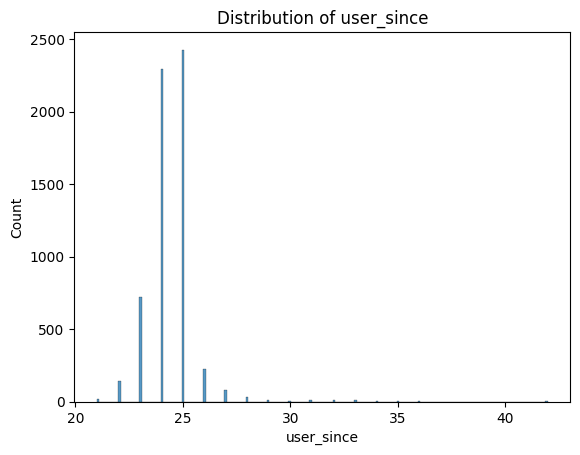

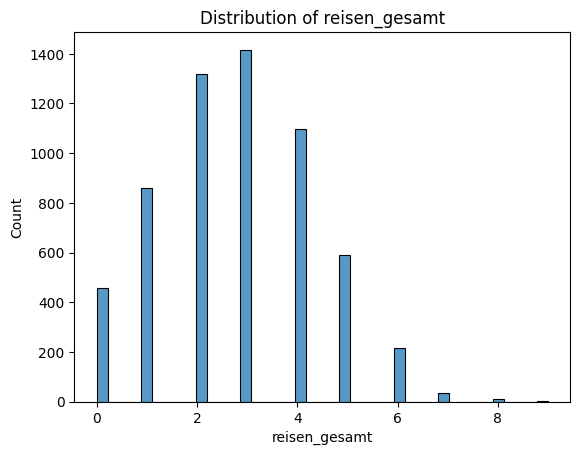

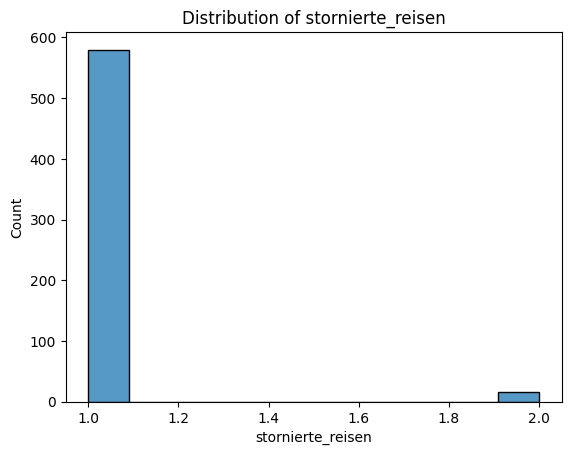

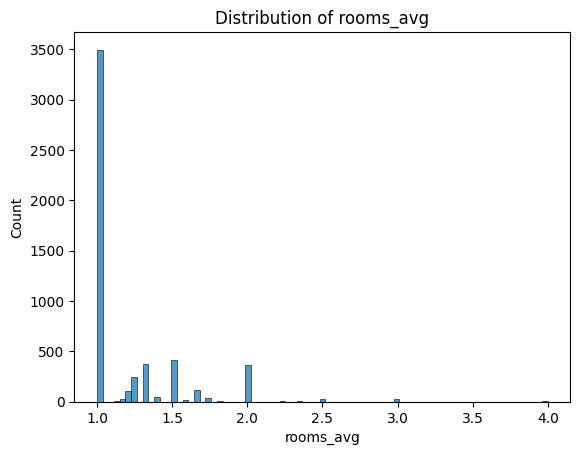

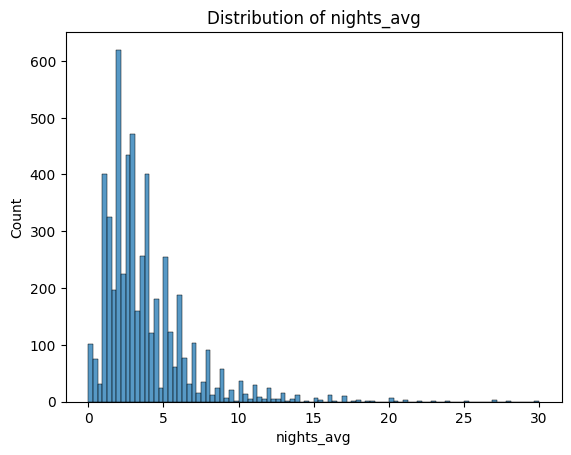

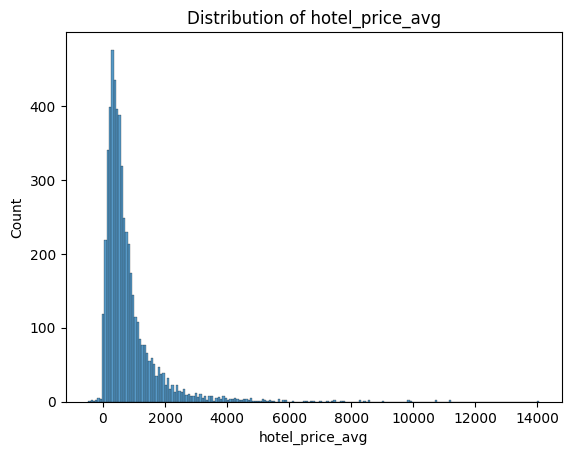

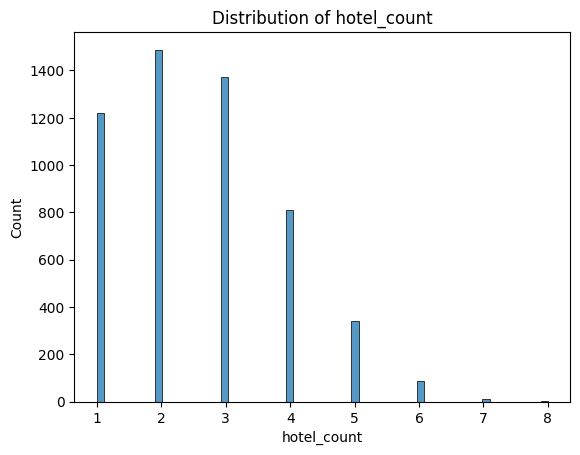

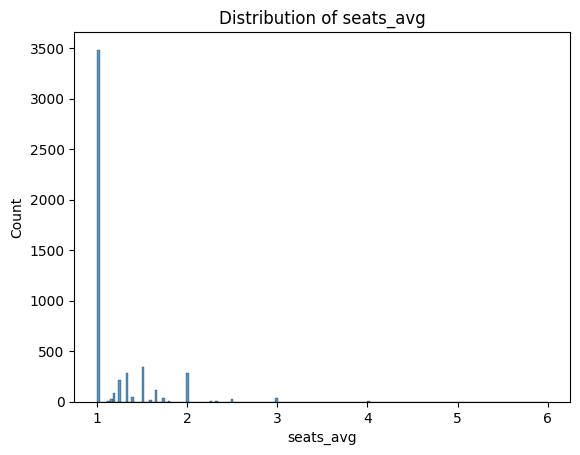

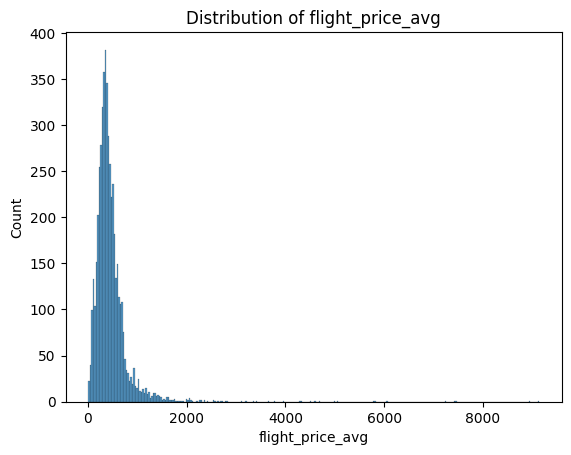

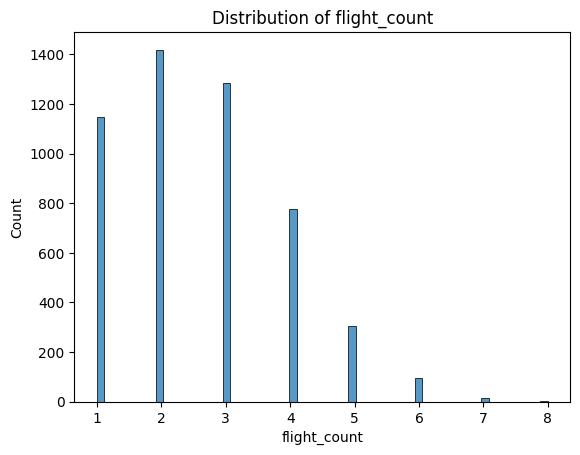

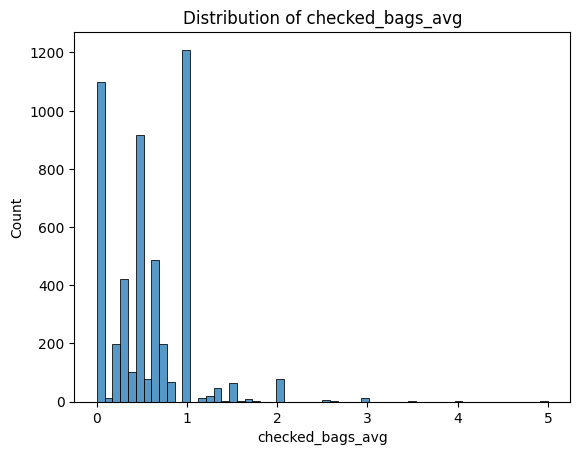

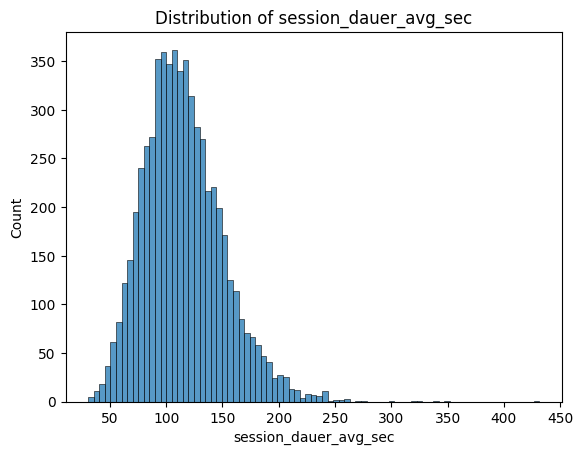

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in uf.columns:
  sns.histplot(data=uf, x=col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


<Axes: xlabel='hotel_price_avg', ylabel='flight_price_avg'>

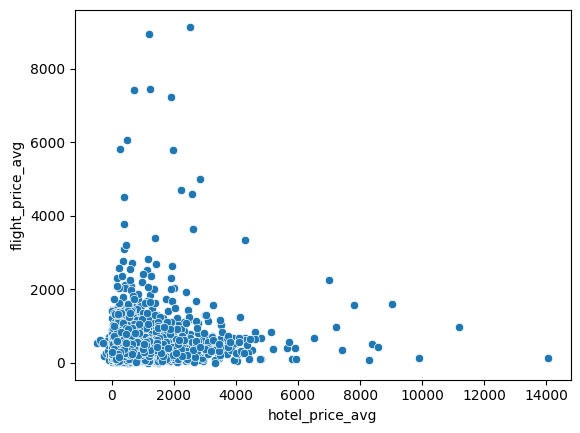

In [ ]:
sns.scatterplot(data=uf, x='hotel_price_avg', y='flight_price_avg')

<Axes: xlabel='seats_avg', ylabel='rooms_avg'>

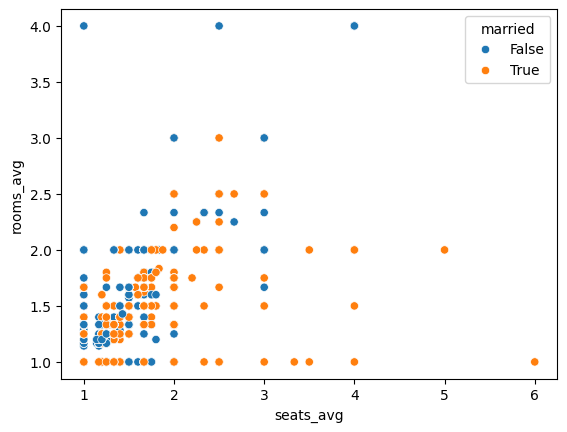

In [ ]:
sns.scatterplot(data=uf, x='seats_avg', y='rooms_avg', hue='married')

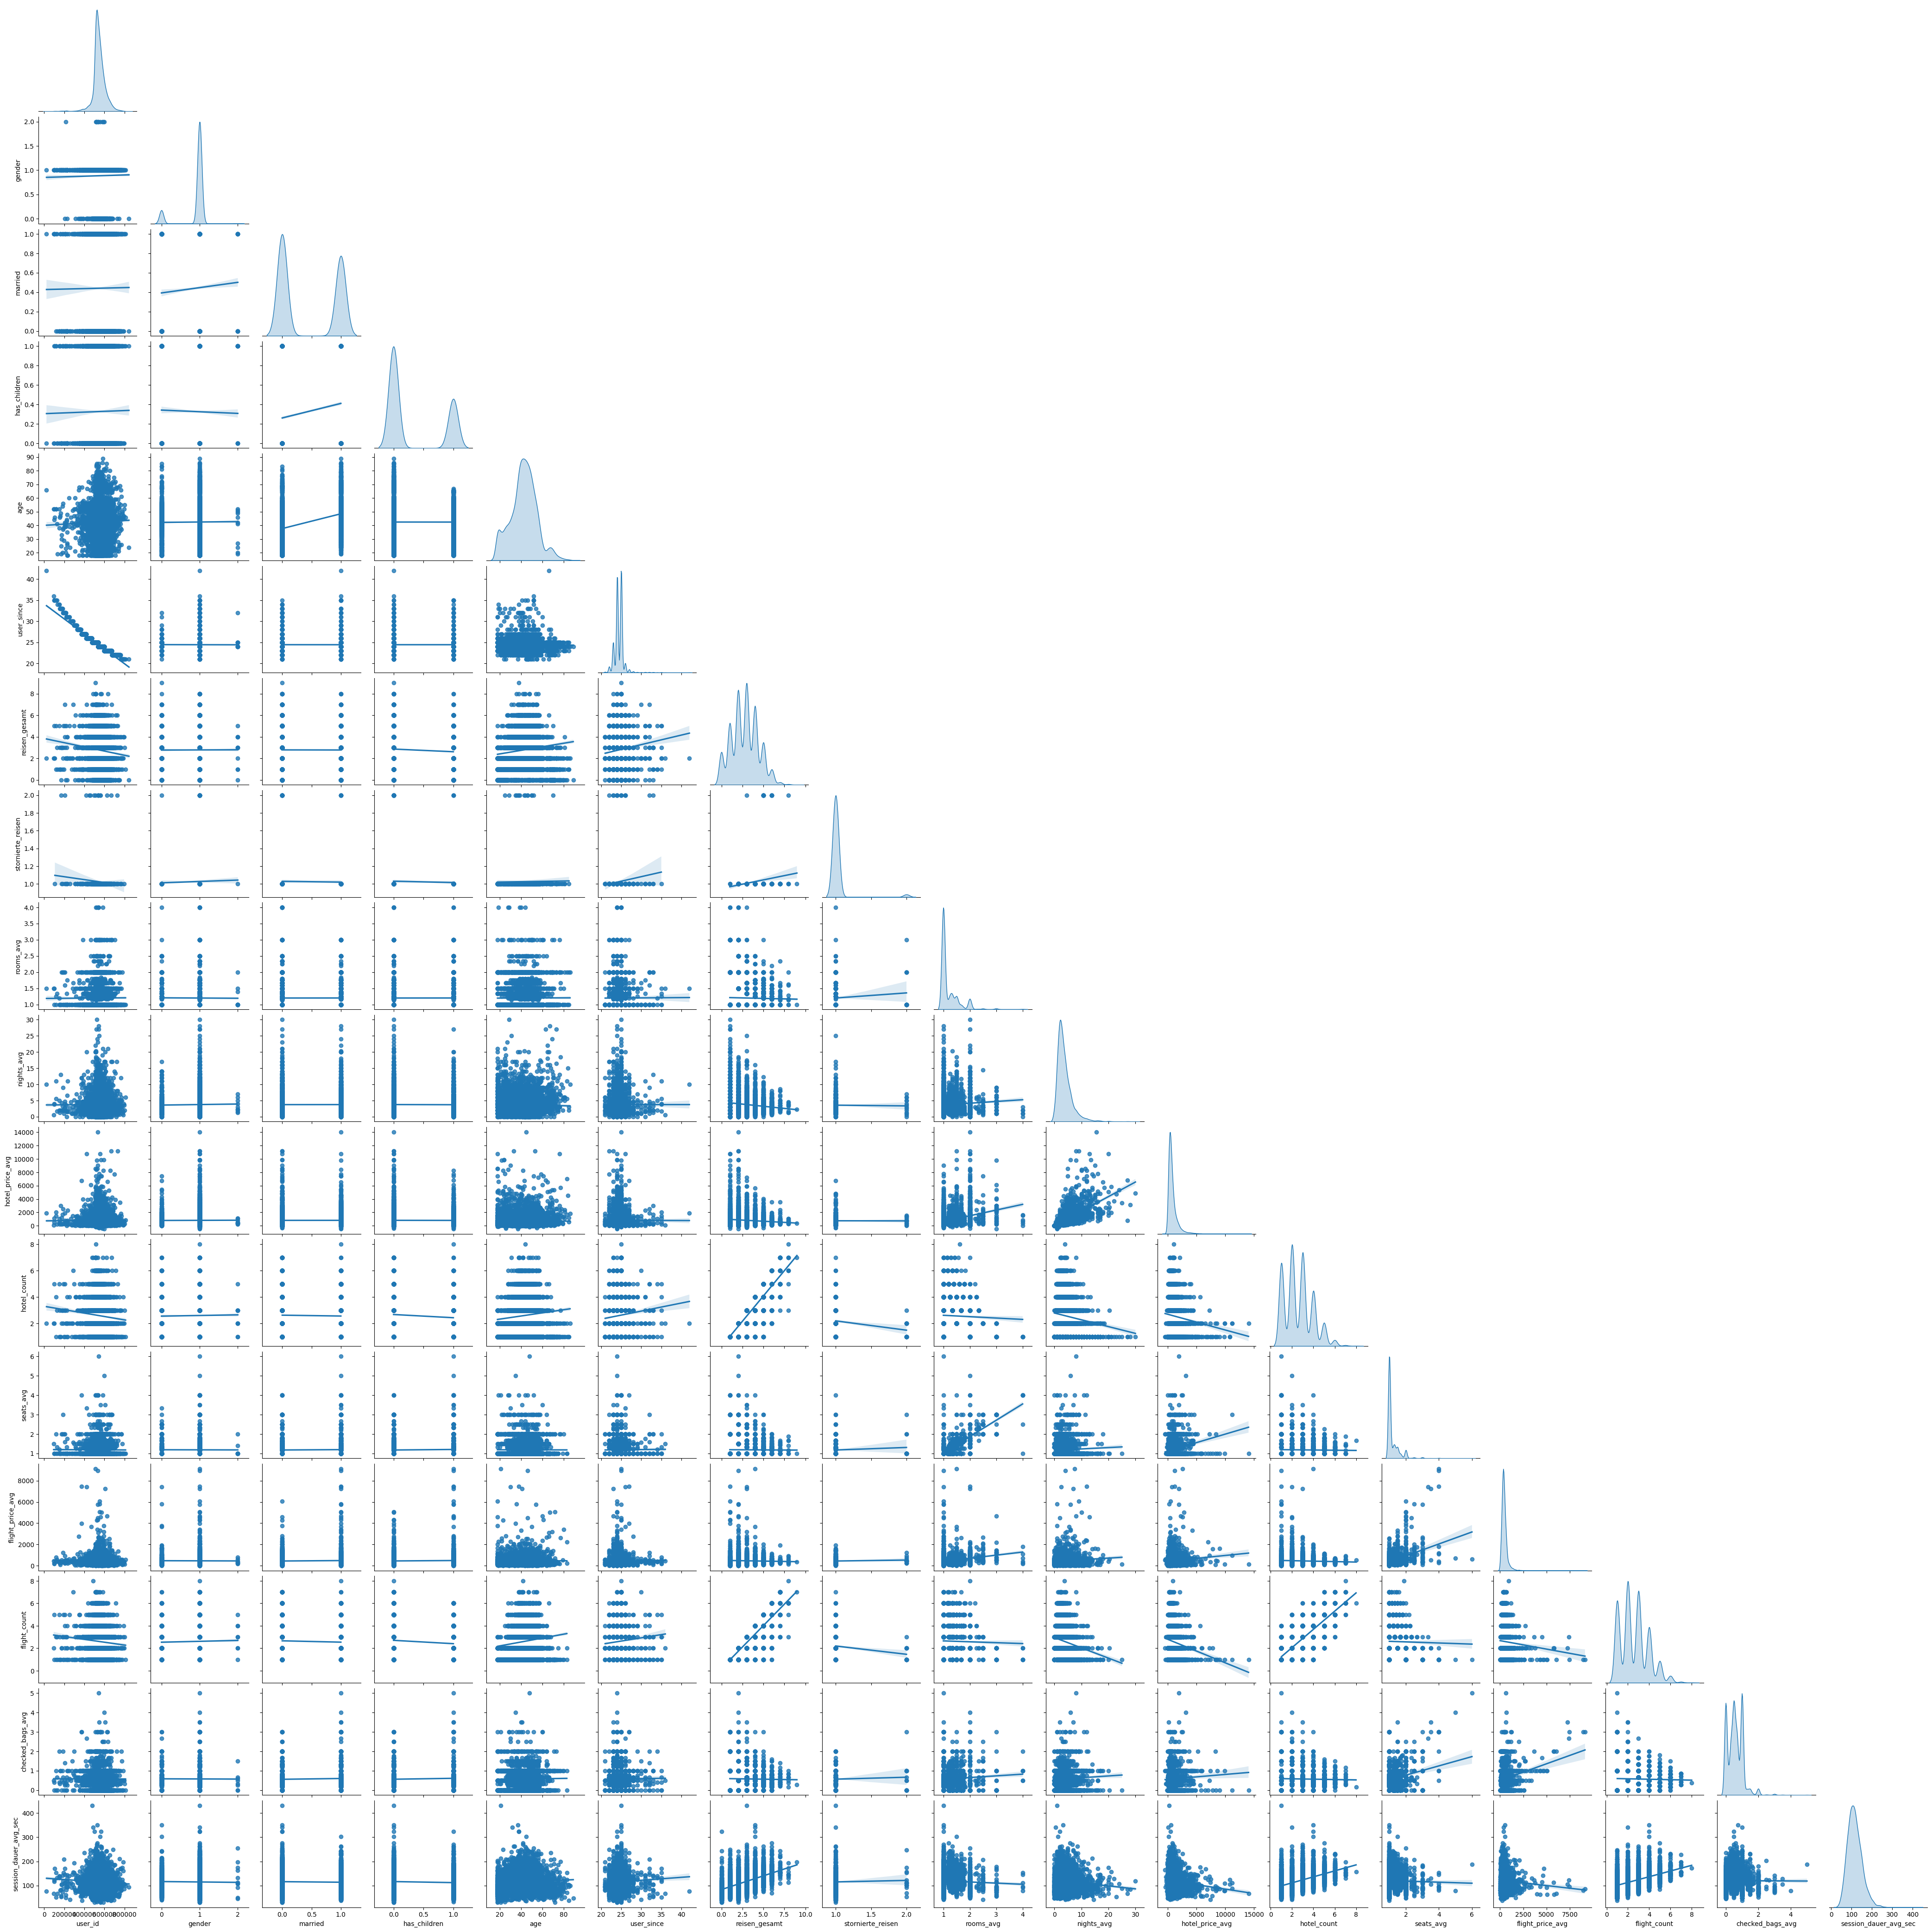

In [ ]:
sns.pairplot(data=uf, corner=True, kind='reg', diag_kind='kde')

<Axes: xlabel='married', ylabel='Count'>

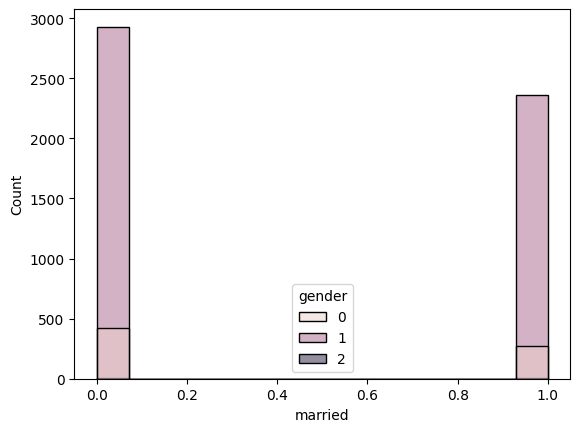

In [ ]:
sns.histplot(data=uf, x='married',hue='gender')

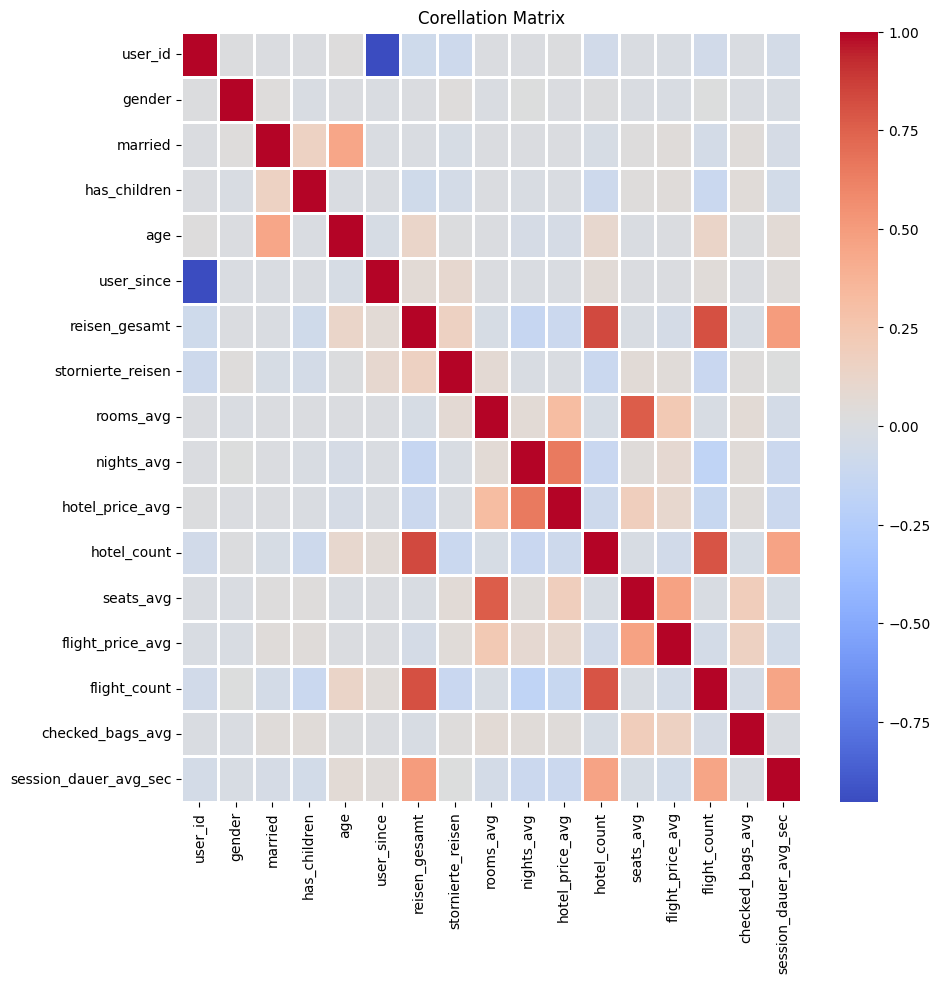

In [4]:
corr_matrix = uf.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix, annot= False, cmap='coolwarm', fmt='.2f',linewidths=1)

plt.title('Corellation Matrix')
plt.show()

In [5]:
cl = uf.drop(columns=['user_id','user_since'])
cl.head()

,gender,married,has_children,age,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec
0,1,False,False,40,2,NaN,1.500000,2.500000,492.500000,2.0,1.500000,944.1450,2.0,0.500000,70.875
1,1,False,False,43,4,NaN,1.500000,1.250000,407.500000,4.0,1.500000,893.1925,4.0,0.750000,146.750
2,1,False,False,37,3,NaN,1.333333,6.333333,1939.666667,3.0,1.333333,607.4300,3.0,0.333333,116.375
3,1,True,False,48,4,NaN,1.750000,1.500000,798.250000,4.0,1.750000,387.0275,4.0,0.250000,119.625
4,0,False,False,29,2,NaN,1.500000,1.000000,163.000000,2.0,1.500000,488.3400,2.0,0.500000,102.750


In [8]:

binary_cols = ['married', 'has_children', 'gender']
cl[binary_cols] = cl[binary_cols].astype('int64')
cl= cl.fillna(0)

In [10]:
cl.head()

,gender,married,has_children,age,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec
0,1,0,0,40,2,0.0,1.500000,2.500000,492.500000,2.0,1.500000,944.1450,2.0,0.500000,70.875
1,1,0,0,43,4,0.0,1.500000,1.250000,407.500000,4.0,1.500000,893.1925,4.0,0.750000,146.750
2,1,0,0,37,3,0.0,1.333333,6.333333,1939.666667,3.0,1.333333,607.4300,3.0,0.333333,116.375
3,1,1,0,48,4,0.0,1.750000,1.500000,798.250000,4.0,1.750000,387.0275,4.0,0.250000,119.625
4,0,0,0,29,2,0.0,1.500000,1.000000,163.000000,2.0,1.500000,488.3400,2.0,0.500000,102.750


# Werte scalieren

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cl)


In [13]:
df_scaled

array([[ 0.35243071, -0.88726925, -0.69617057, ..., -0.12756393,
         0.02824663, -1.24421676],
       [ 0.35243071, -0.88726925, -0.69617057, ...,  1.19048677,
         0.55790722,  0.88324179],
       [ 0.35243071, -0.88726925, -0.69617057, ...,  0.53146142,
        -0.32486043,  0.0315574 ],
       ...,
       [ 0.35243071,  1.1270536 , -0.69617057, ..., -0.12756393,
         0.02824663, -0.0770937 ],
       [ 0.35243071,  1.1270536 ,  1.43642958, ...,  0.53146142,
        -0.32486043,  0.97748396],
       [ 0.35243071,  1.1270536 ,  1.43642958, ..., -0.12756393,
        -1.03107455, -0.88321473]])

In [14]:

import plotly.express as px

from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans


# Dimensionen mit Principal Components Analysie reduzieren

In [15]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_scaled)

In [16]:
pca.explained_variance_ratio_

array([0.2635939 , 0.12807341, 0.10298061, 0.0932602 , 0.07338278,
       0.0660522 , 0.06408058, 0.04838283, 0.04229121, 0.03888104])

# Wieviele Dimensionen soll man behalten? cumsum zeigt, wieviele Informationen man jeweils behält

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2635939 , 0.39166731, 0.49464792, 0.58790812, 0.6612909 ,
       0.7273431 , 0.79142368, 0.8398065 , 0.88209771, 0.92097875])

In [18]:
px.scatter_3d(pca_result, x=0, y=1, z=2)

# Mit Kmeans Clustering alle Benutzer in 5 Gruppen teilen, um sie weiter zu analysieren.

In [19]:
from sklearn.cluster import KMeans

In [20]:
X = df_scaled
km = KMeans(n_clusters=5)
km.fit(X)

KMeans(n_clusters=5)

In [21]:
km.labels_

array([2, 1, 1, ..., 2, 2, 4], dtype=int32)

In [22]:
cl['cluster'] = km.labels_

In [23]:
cl

,gender,married,has_children,age,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec,cluster
0,1,0,0,40,2,0.0,1.500000,2.500000,492.500000,2.0,1.500000,944.145000,2.0,0.500000,70.875000,2
1,1,0,0,43,4,0.0,1.500000,1.250000,407.500000,4.0,1.500000,893.192500,4.0,0.750000,146.750000,1
2,1,0,0,37,3,0.0,1.333333,6.333333,1939.666667,3.0,1.333333,607.430000,3.0,0.333333,116.375000,1
3,1,1,0,48,4,0.0,1.750000,1.500000,798.250000,4.0,1.750000,387.027500,4.0,0.250000,119.625000,1
4,0,0,0,29,2,0.0,1.500000,1.000000,163.000000,2.0,1.500000,488.340000,2.0,0.500000,102.750000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,0,1,0,42,2,0.0,1.000000,3.500000,466.000000,2.0,1.000000,546.350000,1.0,1.000000,115.125000,3
5994,1,0,0,35,5,0.0,1.600000,4.600000,741.800000,5.0,1.800000,805.824000,5.0,1.200000,179.875000,1
5995,1,1,0,48,2,0.0,1.000000,4.000000,1040.000000,1.0,1.000000,523.340000,2.0,0.500000,112.500000,2
5996,1,1,1,55,3,0.0,1.000000,0.000000,0.000000,2.0,1.333333,301.646667,3.0,0.333333,150.111111,2


# Wieviele Benutzer gibt es in jeder Gruppe?

In [24]:
cl['cluster'].value_counts()

,count
cluster,
2,2406
1,1796
0,697
3,582
4,517


In [25]:
cl.mean()

,0
gender,0.885962
married,0.440480
has_children,0.326442
age,42.453151
reisen_gesamt,2.784595
stornierte_reisen,0.101701
rooms_avg,1.066790
nights_avg,3.323326
hotel_price_avg,720.697145
hotel_count,2.316772


In [26]:
cl.groupby('cluster').mean()

,gender,married,has_children,age,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec
cluster,,,,,,,,,,,,,,,
0,0.893831,0.378766,0.334290,38.090387,0.545194,0.167862,0.114778,0.370158,48.071019,0.114778,0.097561,36.623953,0.101865,0.038020,84.735236
1,0.994989,0.412584,0.246659,44.020601,4.418151,0.095768,1.171522,3.236716,662.720894,3.851893,1.162436,423.129412,3.789532,0.554305,142.285126
2,1.002078,0.492103,0.383209,42.744389,2.338736,0.082294,1.171481,2.987185,582.945899,1.917706,1.206221,495.182332,1.891937,0.607786,106.120323
3,0.000000,0.408935,0.340206,43.072165,3.054983,0.121993,1.179954,3.247881,694.355498,2.518900,1.169044,467.868808,2.450172,0.578036,120.562300
4,0.953578,0.415861,0.313346,40.837524,1.899420,0.100580,1.371825,9.254803,2499.625758,1.582205,0.473565,167.510343,0.584139,0.190039,98.973509


# Ursprüngliche User-Id hinzufügen, damit der Auftraggeber sie indentifizieren und anmailen kann

In [28]:
#vorsichtshalber einen neuen DataFrame erstellen
cl2=cl
cl2['user_id']=uf2['user_id']
cl2.head(10)

,gender,married,has_children,age,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec,cluster,user_id
0,1,0,0,40,2,0.0,1.500000,2.500000,492.500000,2.0,1.500000,944.145000,2.0,0.500000,70.875,2,531931
1,1,0,0,43,4,0.0,1.500000,1.250000,407.500000,4.0,1.500000,893.192500,4.0,0.750000,146.750,1,611065
2,1,0,0,37,3,0.0,1.333333,6.333333,1939.666667,3.0,1.333333,607.430000,3.0,0.333333,116.375,1,586762
3,1,1,0,48,4,0.0,1.750000,1.500000,798.250000,4.0,1.750000,387.027500,4.0,0.250000,119.625,1,229330
4,0,0,0,29,2,0.0,1.500000,1.000000,163.000000,2.0,1.500000,488.340000,2.0,0.500000,102.750,3,536035
5,1,0,0,46,5,0.0,1.200000,3.600000,1074.000000,5.0,1.200000,697.142000,5.0,0.000000,171.750,1,477730
6,1,0,0,39,3,0.0,1.000000,4.000000,720.333333,3.0,1.000000,202.276667,3.0,0.000000,91.500,2,513030
7,1,1,1,42,3,0.0,1.000000,2.666667,294.666667,3.0,1.000000,482.623333,3.0,0.666667,88.250,2,570821
8,1,0,0,39,5,0.0,1.200000,6.800000,890.000000,5.0,1.000000,459.085000,2.0,0.000000,196.750,1,517076
9,1,1,1,49,1,0.0,1.000000,1.000000,121.000000,1.0,1.000000,394.550000,1.0,0.000000,81.875,2,585248


In [32]:
cl2.describe()

,gender,married,has_children,age,reisen_gesamt,stornierte_reisen,rooms_avg,nights_avg,hotel_price_avg,hotel_count,seats_avg,flight_price_avg,flight_count,checked_bags_avg,session_dauer_avg_sec,cluster,user_id
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
mean,0.885962,0.440480,0.326442,42.453151,2.784595,0.101701,1.066790,3.323326,720.697145,2.316772,0.997519,389.426226,2.193565,0.486668,115.249517,1.737579,545440.695565
std,0.323603,0.496486,0.468950,12.055388,1.570621,0.310444,0.502299,2.934004,930.796045,1.456966,0.551127,438.886395,1.517519,0.472040,35.667593,1.066487,64924.749760
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.666667,0.000000,23557.000000
25%,1.000000,0.000000,0.000000,35.000000,2.000000,0.000000,1.000000,1.500000,224.000000,1.000000,1.000000,186.835625,1.000000,0.000000,90.555556,1.000000,517152.000000
50%,1.000000,0.000000,0.000000,43.000000,3.000000,0.000000,1.000000,2.750000,478.000000,2.000000,1.000000,345.503000,2.000000,0.500000,111.500000,2.000000,540542.000000
75%,1.000000,1.000000,1.000000,50.000000,4.000000,0.000000,1.250000,4.500000,879.166667,3.000000,1.200000,502.593750,3.000000,0.800000,136.000000,2.000000,574146.000000
max,2.000000,1.000000,1.000000,89.000000,9.000000,2.000000,4.000000,30.000000,14057.000000,8.000000,6.000000,9135.130000,8.000000,5.000000,431.333333,4.000000,844489.000000


# Kreis-Diagramm

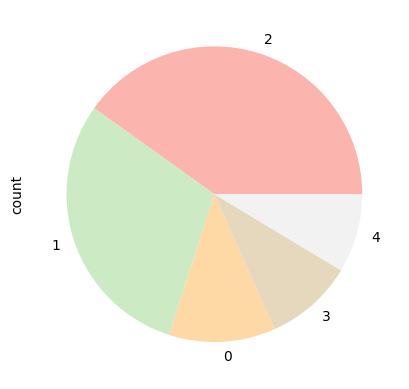

In [27]:
cl['cluster'].value_counts().plot(kind='pie', colormap='Pastel1')
plt.xlabel= ''
plt.titel= 'Anteile'
plt.show()

# Grupppen als Balkendiagramm darstellen

<ipython-input-33-7f56f5d8df11>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




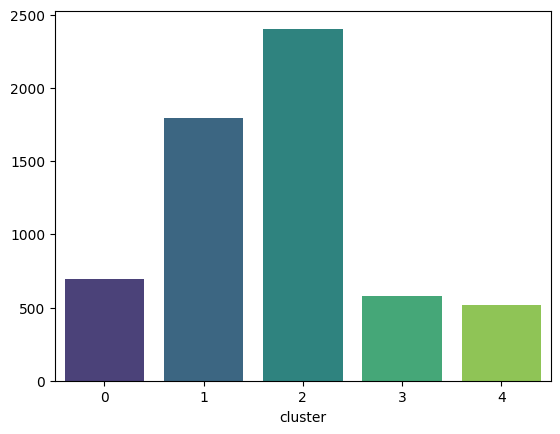

In [33]:
counts=cl2['cluster'].value_counts()
sns.barplot(x=counts.index, y = counts.values, palette ='viridis')
plt.xlabel='Gruppen'
plt.ylabel='Anzahl der Kunden'
plt.title='Verteilung'
plt.show()

In [38]:
result= cl2.sort_values('cluster')
print(result)

      gender  married  has_children  age  reisen_gesamt  stornierte_reisen  \
4815       1        1             0   69              0                0.0   
5559       0        1             1   33              0                0.0   
2785       1        0             1   46              0                0.0   
5555       1        1             1   55              0                0.0   
2781       1        1             0   40              1                0.0   
...      ...      ...           ...  ...            ...                ...   
1580       1        0             1   22              1                0.0   
1578       1        0             1   27              1                0.0   
4868       1        0             1   26              3                0.0   
4880       1        0             0   45              3                0.0   
5997       1        1             1   37              2                0.0   

      rooms_avg  nights_avg  hotel_price_avg  hotel_count  seat

# Ergebnis - sortierte Datei mit Usergruppen - als .csv exportieren

In [39]:
result.to_csv('sortierte_gruppen.csv', index=False)

In [40]:
result.to_csv('sortierte_gruppen_semicolon.csv', index=False, sep=';')

# Optional: die segmentierte User-Features Tabelle mit der ursprünglichen User-Tabelle mergen, um sich die Daten nochmal anzuschauen

In [41]:
url_users ="https://raw.githubusercontent.com/Akienobob/Masterschool/refs/heads/main/users.csv"
users = pd.read_csv(url_users)

In [43]:
result_mit_users = users.merge(result, how='inner', on='user_id')

In [46]:
result_mit_users.to_csv('sortierte_gruppen_mit_benutzerdaten.csv', index=False)

In [47]:
result_mit_users.to_csv('sortierte_gruppen_mit_benutzerdaten_semicolon.csv', index=False, sep=';')